<a href="https://colab.research.google.com/github/RafaelRamos19/Deep-learning-com-pytorch/blob/main/Deep_learning_com_pyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tipos de tensores
Se uma lista do python estiver em formato de matriz, é possível transforma-la em tensor como no exemplo abaixo

Observe que o novo tipo da lista é um tensor

In [ ]:
import torch
lista = [[1,2,3],
         [4,5,6]]
tns = torch.Tensor(lista)
print(type(tns))
print(tns)

<class 'torch.Tensor'>
tensor([[1., 2., 3.],
        [4., 5., 6.]])


É possivel fazer um tensor a partir de um array numpy

In [ ]:
import numpy as np
arr = np.random.rand(3,4)
tns = torch.from_numpy(arr)

print(tns)
print(type(tns))

tensor([[0.0811, 0.2037, 0.2247, 0.1569],
        [0.3241, 0.2725, 0.4587, 0.1234],
        [0.6388, 0.6343, 0.5151, 0.9781]], dtype=torch.float64)
<class 'torch.Tensor'>


É possível também inicializar um tensor vazio ou randomico

In [ ]:
um = torch.ones(2,3)
zeros = torch.zeros(2,3)
random = torch.randn(2,3)

print(um, '\n', zeros,'\n', random)

tensor([[1., 1., 1.],
        [1., 1., 1.]]) 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 
 tensor([[-1.1834,  1.7345,  2.5106],
        [ 1.0458,  0.5182, -0.5453]])


passando-os para array numpy

In [ ]:
arr = random.data.numpy()
arr

array([[-1.1834147 ,  1.7345188 ,  2.5105774 ],
       [ 1.0458348 ,  0.51822555, -0.5453026 ]], dtype=float32)

Mudando um valor no tensor:

tensor[linha, coluna] = algo

In [ ]:
print(random)
random[0,2] = 0
random

tensor([[-1.1834,  1.7345,  2.5106],
        [ 1.0458,  0.5182, -0.5453]])


tensor([[-1.1834,  1.7345,  0.0000],
        [ 1.0458,  0.5182, -0.5453]])

.view()
uma operação muito importante pois possibilita o achatamento do vetor de muitas dimenssões

In [ ]:
tensor = torch.randn(2,2,3) # um cubo
print(tensor)

# para linearizar a função view() recebe a quantidade de elementos, nesse caso será 12, pois: 2*2*3 = 12. Ou colocando -1 dará o mesmo resultado

novo_tensor = tensor.view(12)
print(novo_tensor)

tensor([[[ 0.6395,  0.4180,  2.2799],
         [ 2.3161, -1.6891, -0.2741]],

        [[-0.8989,  0.3537, -0.5444],
         [ 2.0264, -0.1958, -0.1158]]])
tensor([ 0.6395,  0.4180,  2.2799,  2.3161, -1.6891, -0.2741, -0.8989,  0.3537,
        -0.5444,  2.0264, -0.1958, -0.1158])


GPU CAST

precisamos também saber a gpu para colocar dados nela e realizar o processamento de forma mais rápida

para saber se a gpu está disponível nód usamos torch.cuda.is_available()

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda')

else:
  device = torch.device('cpu')
print(device)

tns = tns.to(device)
print(tns)

cuda
tensor([[0.0811, 0.2037, 0.2247, 0.1569],
        [0.3241, 0.2725, 0.4587, 0.1234],
        [0.6388, 0.6343, 0.5151, 0.9781]], device='cuda:0',
       dtype=torch.float64)


Ele indicou que estamos usando gpu (sinalizado por cuda)

tns = tns.to(device)

Código que joga as coisas na GPU

tns_out = torch.cat( (tns1, tns2), dim=0 ) concatenação de tensores

#Perceptron

Vamos estudar a equação da reta: ax + by + c = 0

Vamos definir nossos coeficientes, gerar um intervalo para o eixo x com o numpy e depois aplicar a função nesses pontos para criar o eixo y e depois ver o gráfico

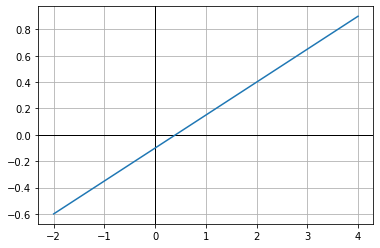

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = -1
b = 4
c = 0.4

x = np.linspace(-2,4,50) # 50 valores entre -2 e 4
y = (-a*x - c)/b

plt.axvline(0,-1,1, color = 'k', linewidth = 1)
plt.axhline(0,-2,4, color = 'k', linewidth = 1)
plt.plot(x,y)
plt.grid(True)

In [ ]:
def plotline(a,b,c):
  x = np.linspace(-2,4,50) # 50 valores entre -2 e 4
  y = (-a*x - c)/b

  plt.axvline(0,-1,1, color = 'k', linewidth = 1)
  plt.axhline(0,-2,4, color = 'k', linewidth = 1)
  plt.plot(x,y)
  plt.grid(True)

vamos plotar valores no plano

0.00


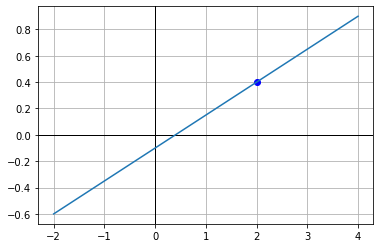

In [ ]:
a = -1
b = 4
c = 0.4

p1 = (2,0.4)
plt.plot(p1[0], p1[1], color='b', marker='o')
plotline(a,b,c)
ret1 = a*p1[0] + b*p1[1] + c
print('%.2f' % ret1)

o ponto está exatamente encima da reta e sua distância até ela é igual a zero

Inserindo outro ponto

0.80
-0.80


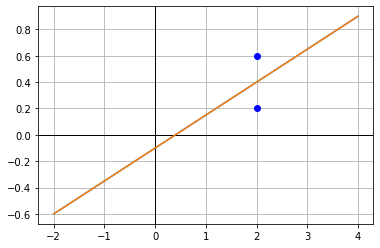

In [ ]:
p2 = (2,0.6)
plt.plot(p2[0], p2[1], color='b', marker='o')
plotline(a,b,c)
ret2 = a*p2[0] + b*p2[1] + c
print('%.2f' % ret2)

p3 = (2,0.2)
plt.plot(p3[0], p3[1], color='b', marker = 'o')
plotline(a,b,c)
ret3 = a*p3[0] + b*p3[1] + c
print('%.2f' % ret3)

O ponto acima da reta está a uma distância positiva da reta, enquanto o outro está negativo

Dessa maneira é possível classificar coisas. exemplo: se acima da reta existissem cachorros e abaixo gatos o modelo conseguiria resolver o problema de classificação

Agora vamos ter dados e tentar plotar a melhor reta que separa aqueles dados para classificação

(100, 2) (100,)


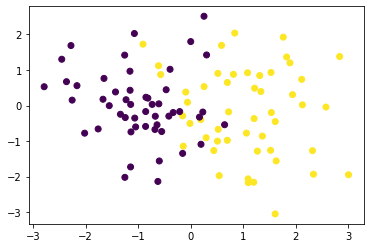

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
np.random.seed(25)

X , Y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

print(X.shape,Y.shape)

# plotando o gráfico
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], marker = 'o', c=Y)

Pegando o ponto qualquer podemos ver qual foi a classificação que foi dada a ele

0


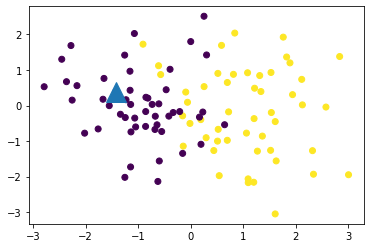

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], marker = 'o', c=Y)
p = X[10]
print(Y[10])
plt.plot(p[0],p[1],marker = '^', markersize = 20)

Agora precisamos encontrar um modelo de classificação para separar esses dados

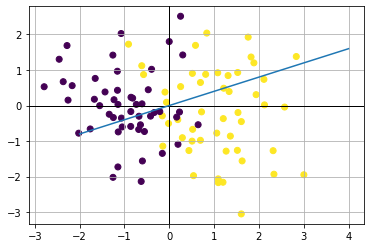

In [ ]:
def plotmodel(w1,w2,b):

  plt.scatter(X[:,0],X[:,1], marker = 'o', c=Y)
  x = np.linspace(-2,4,50) # 50 valores entre -2 e 4
  y = (-w1*x - b)/w2

  plt.axvline(0,-1,1, color = 'k', linewidth = 1)
  plt.axhline(0,-2,4, color = 'k', linewidth = 1)
  plt.plot(x,y)
  plt.grid(True)

w1 = -2
w2 = 5
b = 0
plotmodel(w1,w2,b)

Observe que essa reta separa muito mal os dados, precisamos ajustar isso para que se tenha uma melhor separação dos dados

Manualmente vamos definir valores para os pesos separando os dados

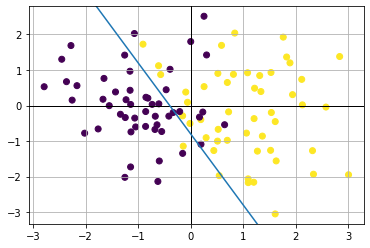

In [ ]:
def plotmodel(w1,w2,b):

  plt.scatter(X[:,0],X[:,1], marker = 'o', c=Y)
  xim, xmax = plt.gca().get_xlim()
  yim, ymax = plt.gca().get_ylim()

  x = np.linspace(-2,4,50) # 50 valores entre -2 e 4
  y = (-w1*x - b)/w2

  plt.axvline(0,-1,1, color = 'k', linewidth = 1)
  plt.axhline(0,-2,4, color = 'k', linewidth = 1)
  plt.plot(x,y)
  plt.grid(True)

  plt.xlim(xim, xmax)
  plt.ylim(yim, ymax)

w1 = 10
w2 = 5
b = 4
plotmodel(w1,w2,b)

Agora ela está bem mais ajustada

-1


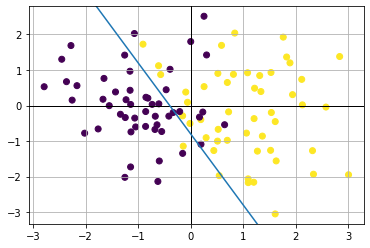

In [ ]:
p = (-1,1)
plotmodel(w1,w2,b)
print(w1*p[0] + w2*p[1] + b)

O ponto (-1,1) é possitivo, logo valores possitivos são da classe de cor amarela e negativos os azul

Dessa maneira já podemos fazer um clssificador

In [ ]:
def classify(ponto, w1,w2,b):
  ret = w1*ponto[0] + w2*ponto[1] + b
  
  if ret >=0:
    return 1,'yellow'
  else:
    return 0,  'blue'


fazendo um teste de classificação

(1, 'yellow')


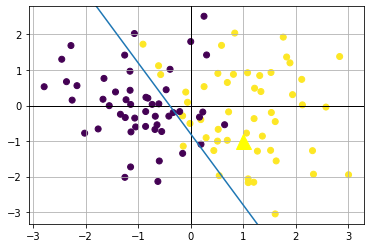

In [ ]:
p = (1,-1)
classe, cor = classify(p, w1,w2,b)
plotmodel(w1,w2,b)
print(classify(p, w1,w2,b))
plt.plot(p[0], p[1], marker='^', color = cor, markersize = 15)

Vamos classificar para todos os pontos da nossa distibuição

In [ ]:
acertos = 0
for k in range(len(X)):
  categ, _ = classify(X[k], w1,w2,b)
  if categ == Y[k]:
    acertos +=1

print('acurácia: {0}'.format(acertos/len(X)))

acurácia: 0.87


Conseguimos uma acurácia razoável

# Usando pytorch efetivamente


o modulo nn é o de criação de redes neurais no pytoch (neural networks), com ele conseguimos implementar camadas neurais com camadas de alto nível

Mesmo com todas as camadas, estamos interessados na camada linear que recebe 2 parâmetros

n_features = dimensionalidade da entrada


out_features = dimensionalidade da saída

Pensando no nosso modelo, nós temos umn_features = 3 (x0,x1,x2) e out_features = 1 (pois nosso modelo retorna apenas um número binário)

Vamos agora implementar o perceptron dentro da sintaxe do pytorch

In [ ]:
from torch import nn
torch.manual_seed(46)
perceptron = nn.Linear(in_features = 3, out_features = 1)

In [ ]:
for nome, tensor in perceptron.named_parameters():
  print(nome, tensor.data)

weight tensor([[ 0.1860, -0.5081,  0.0201]])
bias tensor([-0.3930])


Dessa maneira conseguimos visualizar os pesos e as bias

In [ ]:
w1,w2,w3 = perceptron.weight.data.numpy()[0]
b = perceptron.bias.data.numpy()

In [ ]:

from mpl_toolkits.mplot3d import Axes3D
def plot3d(perceptron):
  
  w1,w2,w3 = perceptron.weight.data.numpy()[0]
  b = perceptron.bias.data.numpy()
  X1 = np.linspace(-1,1,10)
  X2 = np.linspace(-1,1,10)
  
  X1,X2 = np.meshgrid(x,y)
  X3 = (b - X1*w1 - w2*X2) / w3
  fig = plt.figure(figsize = (10,8))
  ax = fig.gca(projection='3d')

  ax.plot_surface(X1,X2,X3, cmap = 'plasma')

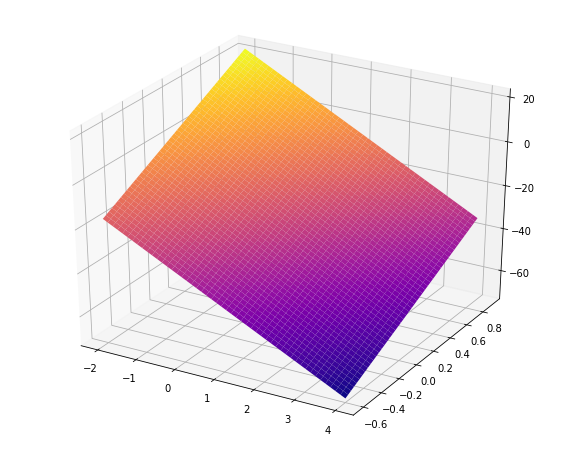

In [ ]:
plot3d(perceptron)


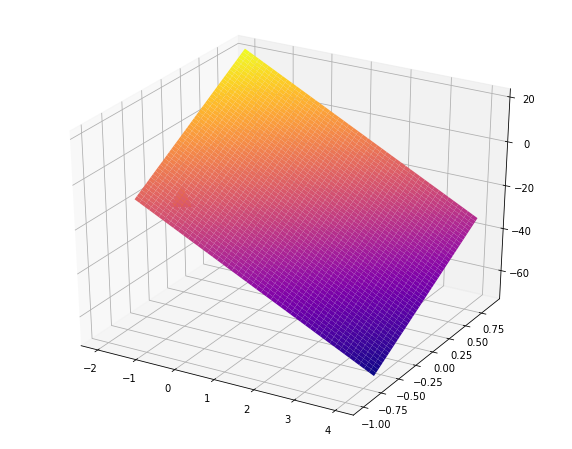

In [ ]:
X = torch.Tensor([0, -1, 2])

plot3d(perceptron)
plt.plot([X[0]], [X[1]], [X[2]], marker='^', markersize=20)

#Funções de ativação 

Como os neurônios humanos, os do modelo só ativam quando existe um estímulo no qual ele foi especializado (um neurônio de prazer não é ativado quando se está sentindo uma dor), da mesma maneria irá funcionar os neurônios da rede neural

In [ ]:
np.random.seed(25)

X , Y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

Vamos usar uma função de ativação sigmoid (não linear)

In [ ]:
perceptron = nn.Linear(2, 1)
sigmoide = nn.Sigmoid()
#definindo os pesos que estavam no nosso modelo acima para que eles não começem de forma aleatória

perceptron.weight = nn.Parameter(torch.Tensor([[10,5]]))
perceptron.bias = nn.Parameter(torch.Tensor([4]))


Com isso feito, poderemos fazer a comparação para saber o quanto aquele modelo anterior fica mehor quando se usa uma função de ativação no modelo

Vamos ativar o perceptron para diferentes pontos e ver como eles se comportam

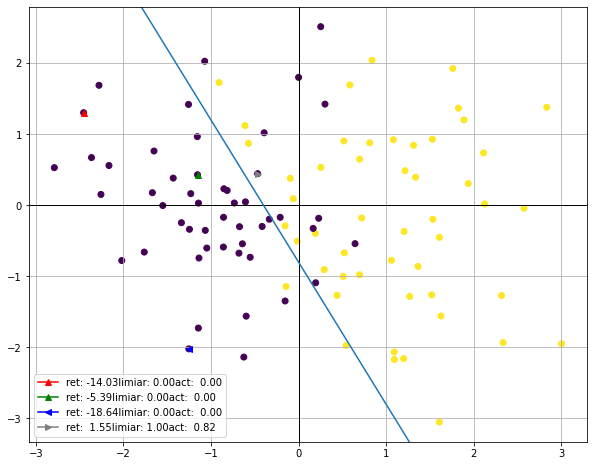

In [ ]:
w1 = 10
w2 = 5
b = 4

markers = ['^','^','<','>']
colors = ['r','g','b','gray']
plt.figure(figsize = (10,8))
plotmodel(w1,w2,b)
for k, idx in enumerate([17,21,43,66]):
  x = torch.Tensor(X[idx])

  ret = perceptron(x)
  act = sigmoide(ret)

  act_limiar = 0 if ret.data < 0 else 1
  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + 'limiar: {:4.2f}'.format(act_limiar) + 'act: {:5.2f}'.format(act.data.numpy()[0])
  plt.plot(x[0], x[1], marker = markers[k], color = colors[k], label = label )
plt.legend()
plt.show()

O act retorna valores de acordo com a função de ativação
valores que estão acima da reta estão na zona de confusão, a função de ativação não sabe ao certo de qual classe são. Quando acontece isso o valor retornado por ela se aproxima de 0.5

#Redes neurais

Quando se tem mais de três classes não é possível separa-las apenas com uma reta
Até agora estudamos classificação com apenas um neurônio, mas vamos usar mais com o conceito de camada

Muitos problemas não possuem solução com modelos lineares

Para resolver isso existe a necessidade de usar mais camadas, ou seja, camadas escondidas. Elas precisam ter funções de ativação não lineares
Esse método permite o cálulo do fluxo inferso, o gradiente

Vamos resolver o problema do xor com uma função de ativação reLU (camada escondida com 6 neurônios) e uma camada de saída com 1 neurônio com a função de ativação sigmoide

A camada escondida receberá o valor da camada de entrada, os transformará a passa-los para camada de saída

Se a camada escondida não tiver uma camada de ativação não linear o classificador não irá conseguir classificar pois ele ficará tentando ajustar retas ao problema

Carregando dados não linearmente separáveis

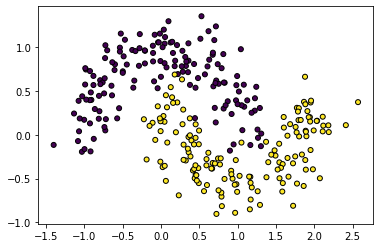

In [ ]:
from sklearn.datasets import make_moons
x1, y1 = make_moons(n_samples = 300, noise = 0.2)
plt.scatter(x1[:,0], x1[:,1], marker = 'o', c = y1, s = 25, edgecolor = 'k')

Observe que seria impossível separar esses dados com uma reta que retornasse um resultado bom

**nn_sequential** 

Ele é um conteiner que se pode colocar multiplas camadas e no forward ele irá passar por cada uma na ordem 

No exemplo iremos colocar como a primeira camada como sendo linear, a segunda reLU e a terceira uma linear (camadas básicas que uma rede neural deve ter)

In [ ]:
from torch import nn
net = nn.Sequential(nn.Linear(in_features = 2,out_features = 8 ), # camada escondida
                    nn.ReLU(), # função de ativação não linear da camada escondida
                    nn.Linear(in_features = 8,out_features = 1)) # camada output
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


out_features na camada escondida é um hiperparâmetro, ou seja, fica a critério do desenvolvedor quantos neurônios existirão na camada escondida

Observe que a mesma quantidade no output na camada escondida é da in_features da camada de saída, isso é uma lei, a quantidade que a camda anterior retorna deve ser a mesma que a proxima camada recebe

In [ ]:
from torchsummary import summary
summary(net, input_size = (1, 2),device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


#Forward

In [ ]:
tensor = torch.from_numpy(x1).float()
pred = net(tensor)
print(pred.size())

torch.Size([300, 1])


Como esperado, a precissão tem os valores de classificação, ou seja, apenas uma coluna

Agora vamos ver como criar um redes neurais maiores com mais camadas usando a classe nn.Module. Nosso modelo deve ser uma subclasse da classe de nn.Module (regra do modelo)

Essa é uma ótima maneira de se fazer isso pois quando se cria a classe como uma subclasse do nn.Module um modelo já é criado, mas na nossa classe podemos especificar coisas a mais do nosso modelo

In [ ]:
class MinhaRede(nn.Module):
  def __init__(self,input_size, hidden_size, output_size):
    super(MinhaRede, self).__init__()
    #aqui vamos definir arquitetura
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, X):
    # aqui vamos gerar uma saída a partir do X de entrada
    hidden = self.relu(self.hidden(X)) # a variavel hidden é o valor que se encontra passando a função de ativação relu depois da linear
    output = self.output(hidden)

    return output


Instanciando rede

In [ ]:
net = MinhaRede(2,8,1)

In [ ]:
tensor = torch.from_numpy(x1).float()
pred = net(tensor)
print(pred.size())

torch.Size([300, 1])


### Subindo para a GPU

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda')

else:
  device = torch.device('cpu')
print(device)


cuda


In [ ]:
net = MinhaRede(2,8,1)
net = net.to(device) # subindo para a gpu

In [ ]:
tensor = torch.from_numpy(x1).float()
tensor = tensor.to(device)
print(pred)

tensor([[0.3124],
        [0.5916],
        [0.2597],
        [0.5758],
        [0.3116],
        [0.2928],
        [0.4133],
        [0.2657],
        [0.4515],
        [0.2895],
        [0.6076],
        [0.2516],
        [0.2908],
        [0.5722],
        [0.4276],
        [0.5301],
        [0.3351],
        [0.3294],
        [0.2670],
        [0.2969],
        [0.4404],
        [0.2550],
        [0.4366],
        [0.3261],
        [0.6184],
        [0.3741],
        [0.2929],
        [0.3236],
        [0.4040],
        [0.5973],
        [0.2625],
        [0.5487],
        [0.4030],
        [0.2627],
        [0.2513],
        [0.6775],
        [0.5261],
        [0.3853],
        [0.3557],
        [0.3222],
        [0.2662],
        [0.3110],
        [0.2784],
        [0.4633],
        [0.2690],
        [0.3963],
        [0.5951],
        [0.5478],
        [0.4774],
        [0.3226],
        [0.2814],
        [0.3405],
        [0.3191],
        [0.5323],
        [0.4508],
        [0